In [72]:
%matplotlib inline
import geopandas as gpd
import pandas as pd
import numpy as np
import pysal
import matplotlib.pyplot as plt
import time 

# Load in the color values your analysis produced

In [3]:
color_df = pd.read_csv('random-subdivision-values.tsv', sep='\t', dtype={'CSDUID': object})
print(color_df.info(memory_usage='deep'))
color_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4224 entries, 0 to 4223
Data columns (total 2 columns):
CSDUID         4224 non-null object
color_value    4224 non-null float64
dtypes: float64(1), object(1)
memory usage: 297.1 KB
None


,CSDUID,color_value
0,5915022,-0.237788
1,5919008,0.291066
2,3520005,-0.845814
3,4611040,0.152208
4,3539036,-0.585537


# Read the shapefile as a GeoDataFrame

In [4]:
canada_df = gpd.GeoDataFrame.from_file("gcsd000b11a_e.shp")
print(canada_df.shape)
# The first two element
canada_df.head(2)

(5253, 19)


,CSDUID,CSDNAME,CSDTYPE,PRUID,PRNAME,CDUID,CDNAME,CDTYPE,CMAUID,CMANAME,CMATYPE,CMAPUID,SACTYPE,SACCODE,ERUID,ERNAME,CCSUID,CCSNAME,geometry
0,5943816,Quatsino Subdivision 18,IRI,59,British Columbia / Colombie-Britannique,5943,Mount Waddington,RD,None,None,None,None,7,999,5910,Vancouver Island and Coast / Île de Vancouver ...,5943031,Mount Waddington C,POLYGON ((-127.5741642679999 50.61221324100006...
1,5915062,Bowen Island,IM,59,British Columbia / Colombie-Britannique,5915,Greater Vancouver,RD,933,Vancouver,B,59933,1,933,5920,Lower Mainland--Southwest / Lower Mainland--Su...,5915020,Greater Vancouver A,(POLYGON ((-123.3803824129999 49.4117749990000...


# Merge in the color specifications for each point

In [5]:
# Create copy of original dataframe
demo_plot = canada_df.copy()

In [6]:
demo_plot = demo_plot.merge(color_df, on='CSDUID')
# Check shape after merge
demo_plot.shape

(4224, 20)

# Plot everything
## Geopandas makes this pretty easy
Check out http://geopandas.org/gallery/plotting_with_geoplot.html for more documentation.  You might try different map projections, different color schemes, or different plots altogether! 

In [7]:
demo_plot.crs = {'init' : 'epsg:4326'}

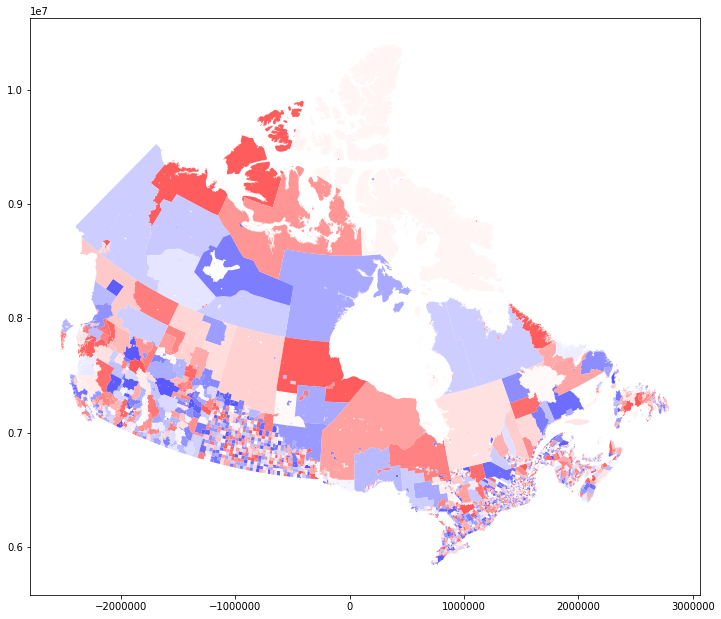

In [8]:
### many data 
#plot the shapefile/GeoDataFrame
g = demo_plot.to_crs("+proj=lcc +lat_1=49 +lat_2=77 +lon_0=-91.52 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs").plot(column='color_value', vmin=-3, vmax=3, cmap='seismic', figsize=(12, 12))

# Getis-Ord Statistics for spatial association 

In [9]:
import os
os.listdir()

['.Python',
 'MIMIC.pem',
 '.DS_Store',
 'bin',
 '92-160-g2011001-eng.pdf',
 'images',
 'gcsd000b11a_e.prj',
 'include',
 'etc',
 'gcsd000b11a_e.zip',
 'plot_canadian_subdivisions (1).py',
 'subdivision_to_word_counts.tsv',
 'random-subdivision-values.tsv',
 'region_word_matrix.csv',
 'Plot Canadian Subdivisions.ipynb',
 'gcsd000b11a_e.dbf',
 'lib',
 'pip-selfcheck.json',
 'gcsd000b11a_e.shx',
 '.ipynb_checkpoints',
 'SI671 F18 - Homework 3.pdf',
 'gcsd000b11a_e.shp',
 'subdivision-to-neighbors.tsv',
 'share']

In [16]:
word_counts = pd.read_csv('subdivision_to_word_counts.tsv', sep='\t', header=None, names=['CSDUID', 'WORDCOUNT'])
print(word_counts.shape)
word_counts.head()

(4224, 2)


,CSDUID,WORDCOUNT
0,5915022,by 10610 david 212 featuring 786 is 18567 in 2...
1,5919008,pst 2105 wind 2604 mph 2604 barometer 2604 in ...
2,3520005,nba 319 made 3500 a 97237 big 3546 mistake 253...
3,4611040,i 24551 mean 411 doing 529 that 7714 against 1...
4,3539036,min 27 phone 171 call 191 with 2517 pizza 97 t...


In [17]:
word_counts.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4224 entries, 0 to 4223
Data columns (total 2 columns):
CSDUID       4224 non-null int64
WORDCOUNT    4224 non-null object
dtypes: int64(1), object(1)
memory usage: 31.6 MB


In [18]:
region_neighbors = pd.read_csv('subdivision-to-neighbors.tsv', sep='\t', header=None, names=['CSDUID', 'NEIGHBORS'])
print(region_neighbors.shape)
region_neighbors.head()

(4240, 2)


,CSDUID,NEIGHBORS
0,2402047,2403015 2402047 2426015 2426010 1215011 241090...
1,5933019,5933019 5933015 5909027 5921034 5921032 595180...
2,2426015,2402047 2448045 2471065 2426015 2426010 247300...
3,2426010,2402047 2448045 2471065 2426015 2426010 247300...
4,1215011,2403015 2402047 1215011 1306020 1101009 110100...


In [19]:
region_neighbors.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 2 columns):
CSDUID       4240 non-null int64
NEIGHBORS    4240 non-null object
dtypes: int64(1), object(1)
memory usage: 23.7 MB


In [20]:
for x in region_neighbors.NEIGHBORS:
    print(len(x.split()))
    break

748


In [21]:
# Convert CSDUID to list
regions = region_neighbors.CSDUID.astype('str').tolist()

# List of tuples of CSDUID and neighbors 
n_list = list(zip(region_neighbors.CSDUID.astype('str').tolist(), [x.split() for x in  region_neighbors.NEIGHBORS]))

# Check
print(regions[:5])
print(n_list[0][0], type(n_list[0][0]))
print(n_list[0][1][0], type(n_list[0][1][0]))
print(len(n_list[:1][0][1]))

['2402047', '5933019', '2426015', '2426010', '1215011']
2402047 <class 'str'>
2403015 <class 'str'>
748


In [22]:
# Nested dict of CSDUID and all neighbors initialized with value 1
neighbors = {}

for t in n_list:
    k = t[0]
    values = t[1]
    neighbors[k]={}
    for v in values:
        neighbors[k][v]=1

In [23]:
# # Check
# neighbors['2402047']

In [24]:
# List of regions with words
w_regions = word_counts.CSDUID.astype(str).tolist()
# Check
print(w_regions[:5])
print(len(w_regions))

['5915022', '5919008', '3520005', '4611040', '3539036']
4224


In [25]:
%%time 

words_by_region = []

for i in word_counts.itertuples():
    # CSDUID
    region_id = i[1]
    
    # Word counts e.g, ['apple', '23', ...]
    word_list = i[2].split()
    
    # Iterate every 2 to get word and number
    uniq_word_counts = {}    
    it = iter(word_list)
    for x in it:
        if x not in uniq_word_counts:
            uniq_word_counts[x] = next(it)
    
    words_by_region.append(pd.Series(uniq_word_counts).to_frame(name=region_id))

CPU times: user 3.78 s, sys: 41.1 ms, total: 3.82 s
Wall time: 3.83 s


In [26]:
# Check
print(words_by_region[0].info(memory_usage='deep'))
words_by_region[0].head()

<class 'pandas.core.frame.DataFrame'>
Index: 9713 entries, by to fifty
Data columns (total 1 columns):
5915022    9713 non-null object
dtypes: object(1)
memory usage: 1.2 MB
None


,5915022
by,10610
david,212
featuring,786
is,18567
in,24940


In [27]:
# Combine all dataframes into one. Transpose so row and column switch
region_word_matrix = pd.concat(words_by_region, axis=1, sort=False, join='outer').transpose()
region_word_matrix.fillna(0,inplace=True)

In [28]:
# Check
print(region_word_matrix.info(memory_usage='deep'))
region_word_matrix.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4224 entries, 5915022 to 5931814
Columns: 10000 entries, by to gmt+0000
dtypes: object(10000)
memory usage: 1.3 GB
None


,by,david,featuring,is,in,vera,on,the,drive,vancouver,...,sainte-catherine,saint-marc,mont-tremblant,hausse,pointe-claire,pierre-elliott-trudeau,lente,dp-,n/gust,gmt+0000
5915022,10610,212,786,18567,24940,6909,17058,44997,7200,19253,...,0,0,0,0,0,0,0,0,0,0
5919008,34,2,0,151,5402,0,94,407,4,9,...,0,0,0,0,0,0,0,0,0,0
3520005,10414,632,183,57654,67355,9,61868,152713,720,173,...,0,0,0,0,0,0,0,0,0,0
4611040,2051,95,10,10790,11881,1,7437,26666,222,41,...,0,0,0,0,0,0,0,0,0,0
3539036,663,21,6,4560,4975,1,4424,11055,85,4,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# region neighbors dataframe had more rows than word count
# Some regions did not have any words
empty_regions = [i for i in regions if i not in w_regions]
empty_regions

['2442100',
 '2435035',
 '2494255',
 '2484035',
 '4716014',
 '4623058',
 '4711094',
 '4711041',
 '2450057',
 '2406005',
 '2431035',
 '4813013',
 '6103097',
 '2488010',
 '5931844',
 '2433040']

In [30]:
# add missing CSDUID with 0 
for _id in empty_regions:
    region_word_matrix.loc[int(_id)] = 0

In [31]:
region_word_matrix.shape

(4240, 10000)

In [32]:
# Save the word matrix for easy access earlier
region_word_matrix.to_csv('./region_word_matrix.csv')

# Get weights

In [41]:
# Get weights
weights = pysal.weights.weights.W(neighbors, id_order=region_word_matrix.index.astype('str'))

In [74]:
weights.n

4240

In [42]:
# Save weights 
gal = pysal.open('./weights.gal','w')
gal.write(weights)
gal.close()

In [43]:
def local_getisord_by_word(word, w=weights, perm=99):
    '''Calculate the local getisord of word over regions
    
    :param word: word count across regions
    :type word: dataframe
    :param perm: number of permutations 
    :type perm: int
    :return score: z_sim scores
    :rtype: array 
    '''
    y = np.array(word).astype('int')
    
    g = pysal.esda.getisord.G_Local(y, weights, star=True, permutations=perm)
    score = g.z_sim
    
    return score

# Try local getisord on the word 'vancourver' 

In [59]:
# All counts of the word vancouver 
test_1 = region_word_matrix[['vancouver']].astype(int)
print(test_1.info(memory_usage='deep'))
test_1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4240 entries, 5915022 to 2433040
Data columns (total 1 columns):
vancouver    4240 non-null int64
dtypes: int64(1)
memory usage: 66.2 KB
None


,vancouver
5915022,19253
5919008,9
3520005,173
4611040,41
3539036,4


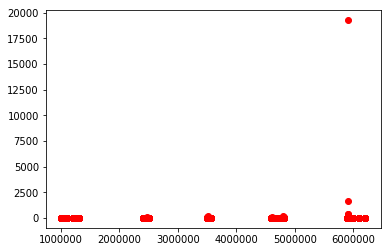

In [65]:
plt.plot(test_1.index, test_1['vancouver'], 'ro')

In [117]:
%%time 
test_1 = test_1.apply(local_getisord_by_word)

CPU times: user 5.35 s, sys: 243 ms, total: 5.59 s
Wall time: 5.59 s


In [118]:
test_1_plot = canada_df.copy()
test_1_plot.head(3)

,CSDUID,CSDNAME,CSDTYPE,PRUID,PRNAME,CDUID,CDNAME,CDTYPE,CMAUID,CMANAME,CMATYPE,CMAPUID,SACTYPE,SACCODE,ERUID,ERNAME,CCSUID,CCSNAME,geometry
0,5943816,Quatsino Subdivision 18,IRI,59,British Columbia / Colombie-Britannique,5943,Mount Waddington,RD,None,None,None,None,7,999,5910,Vancouver Island and Coast / Île de Vancouver ...,5943031,Mount Waddington C,POLYGON ((-127.5741642679999 50.61221324100006...
1,5915062,Bowen Island,IM,59,British Columbia / Colombie-Britannique,5915,Greater Vancouver,RD,933,Vancouver,B,59933,1,933,5920,Lower Mainland--Southwest / Lower Mainland--Su...,5915020,Greater Vancouver A,(POLYGON ((-123.3803824129999 49.4117749990000...
2,5943027,Mount Waddington B,RDA,59,British Columbia / Colombie-Britannique,5943,Mount Waddington,RD,None,None,None,None,7,999,5910,Vancouver Island and Coast / Île de Vancouver ...,5943027,Mount Waddington B,(POLYGON ((-127.8539747939999 50.1760356960000...


In [119]:
# Convert CSDUID to int type
test_1_plot['CSDUID'] = test_1_plot['CSDUID'].astype('int')

In [120]:
# Convert to 'object' type to merge 
test_1['CSDUID'] = test_1.index
print(test_1.info(memory_usage='deep'))
test_1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4240 entries, 5915022 to 2433040
Data columns (total 2 columns):
vancouver    4240 non-null float64
CSDUID       4240 non-null int64
dtypes: float64(1), int64(1)
memory usage: 99.4 KB
None


,vancouver,CSDUID
5915022,5.946764,5915022
5919008,3.260257,5919008
3520005,-0.294835,3520005
4611040,-0.339103,4611040
3539036,-0.287379,3539036


In [51]:
test_1_plot = test_1_plot.merge(test_1, on='CSDUID')

In [52]:
test_1_plot.shape

(4240, 20)

In [53]:
test_1_plot.crs = {'init' : 'epsg:4326'}

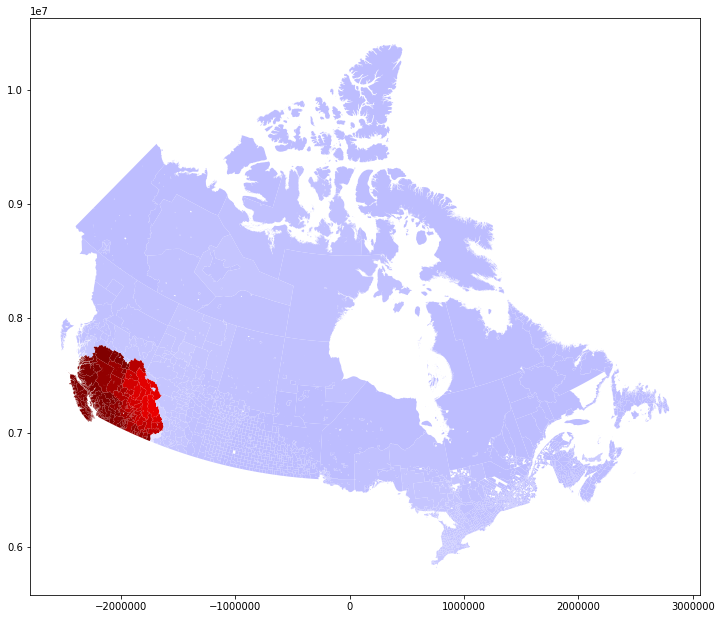

In [55]:
### many data 
#plot the shapefile/GeoDataFrame
g = test_1_plot.to_crs("+proj=lcc +lat_1=49 +lat_2=77 +lon_0=-91.52 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs").plot(column='vancouver', vmin=-3, vmax=3, cmap='seismic', figsize=(12, 12))
plt.savefig('./vancouver.png')

We see that the word vancouver clusters very highly towards the west coast side of Canada around vancouver area.
It is insignificant elsewhere in the rest of Canada. 

# Plot the z score of the local getisord for target words

In [104]:
# Test to see if a word exists 
word = 'moose'

if word in region_word_matrix.columns.tolist():
    print(True)

True


In [105]:
# All counts of the word vancouver 
candidate_words = region_word_matrix[['hot', 'cold', 'french', 'usa', 'japan', 'moose', 'happy', 'hockey', 'cat']].astype('int')
candidate_words.head()

,hot,cold,french,usa,japan,moose,happy,hockey,cat
5915022,530,261,130,63,91,29,1816,229,143
5919008,4,6,0,0,0,0,27,6,0
3520005,2143,1702,503,225,115,88,8360,945,604
4611040,413,343,86,30,15,21,1554,296,162
3539036,179,129,29,15,4,4,541,99,61


In [106]:
%%time
# local getisord on words of interest
results = candidate_words.apply(local_getisord_by_word)

CPU times: user 39.4 s, sys: 2.24 s, total: 41.7 s
Wall time: 43.1 s


In [129]:
results.head()

,hot,cold,french,usa,japan,moose,happy,hockey,cat,CSDUID
5915022,1.144047,0.408299,0.510775,1.474676,3.277275,0.589813,0.726614,0.741429,0.982333,5915022
5919008,0.628874,0.067771,0.061125,0.890775,1.828803,0.095846,0.287842,0.302010,0.524070,5919008
3520005,4.943251,5.328825,4.997928,4.677066,3.372062,2.585633,5.141631,5.232059,5.177877,3520005
4611040,-0.503620,-0.387350,-0.694505,-0.613260,-0.671840,-0.686539,-0.485747,-0.200639,-0.380317,4611040
3539036,6.799907,7.064718,5.224599,5.822371,3.878950,3.659150,6.928062,7.264722,7.288548,3539036


In [107]:
results['CSDUID'] = results.index

In [108]:
plot_data = canada_df.copy()
plot_data['CSDUID'] = plot_data['CSDUID'].astype('int')
plot_data = plot_data.merge(results, on='CSDUID')

In [109]:
# Check
plot_data.shape

(4240, 28)

In [110]:
plot_data.crs = {'init' : 'epsg:4326'}

In [113]:
def word_mapper(data, word):
    '''Plot the local getisord score for word
    
    :param data: plot dataframe
    :type data: geopandas dataframe
    :param word: word of interest
    :type word: string
    :return: word trends mapped on canada
    :rtype: graph 
    '''
    g = data.to_crs("+proj=lcc +lat_1=49 +lat_2=77 +lon_0=-91.52 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs").plot(column=word, vmin=-3, vmax=3, cmap='seismic', figsize=(12, 12))
    plt.savefig('./images/{}.png'.format(word))

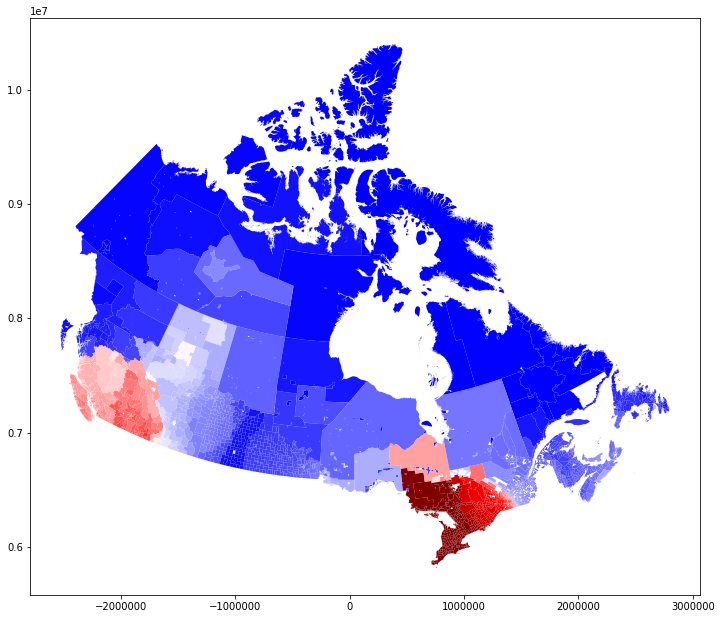

In [97]:
word_mapper(plot_data, 'hot')

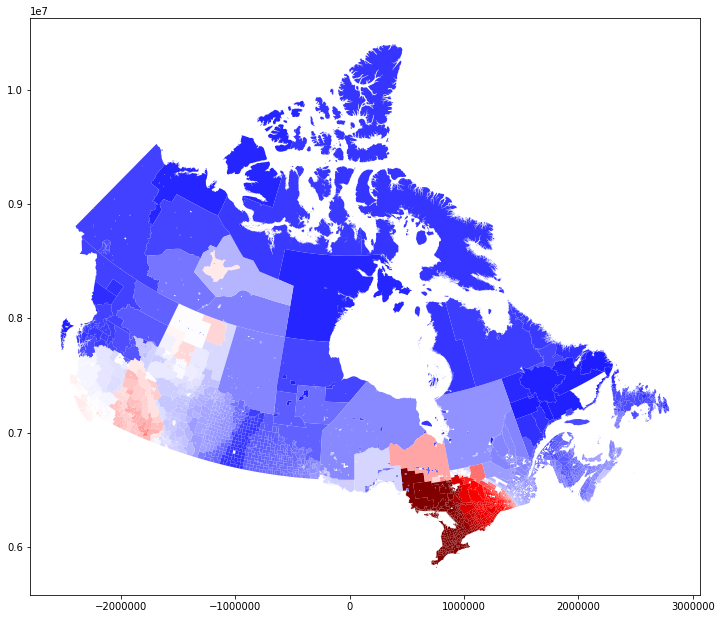

In [98]:
word_mapper(plot_data, 'cold')

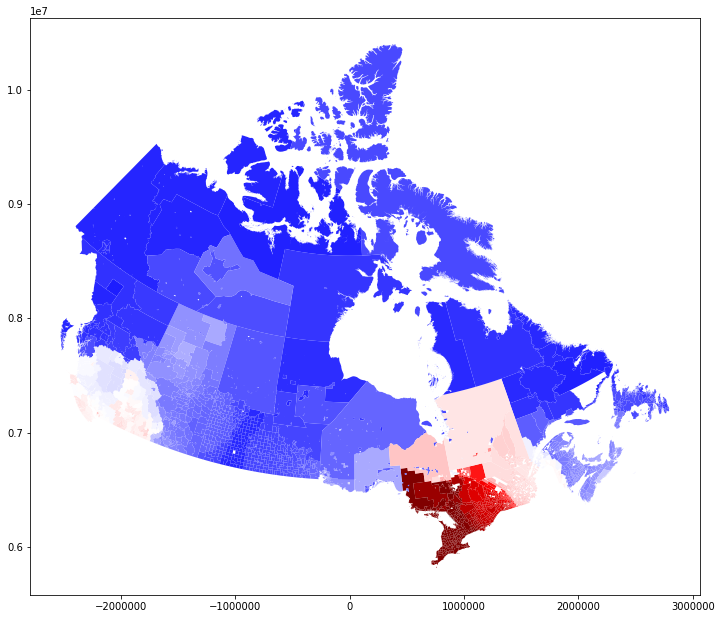

In [99]:
word_mapper(plot_data, 'french')

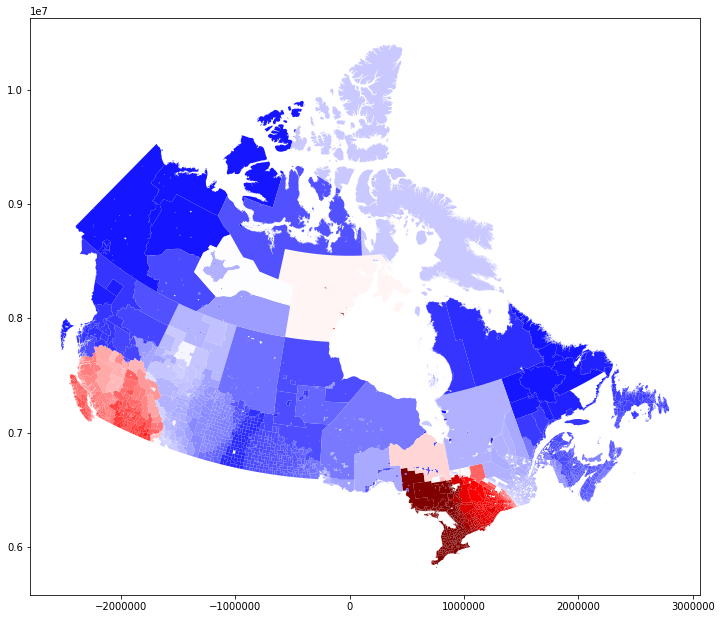

In [100]:
word_mapper(plot_data, 'usa')

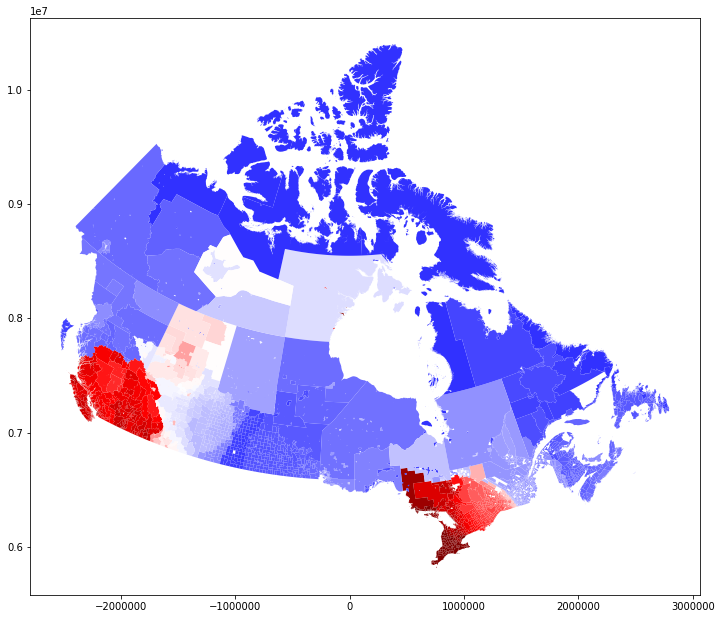

In [101]:
word_mapper(plot_data, 'japan')

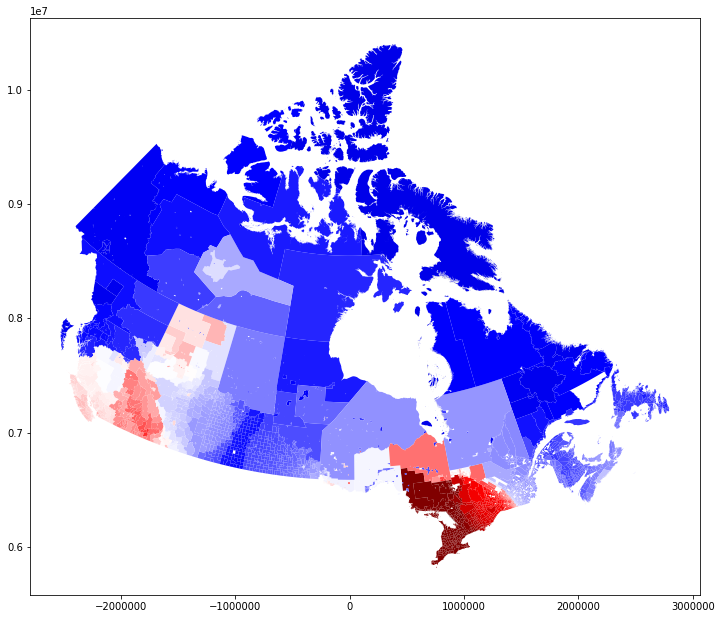

In [102]:
word_mapper(plot_data, 'hockey')

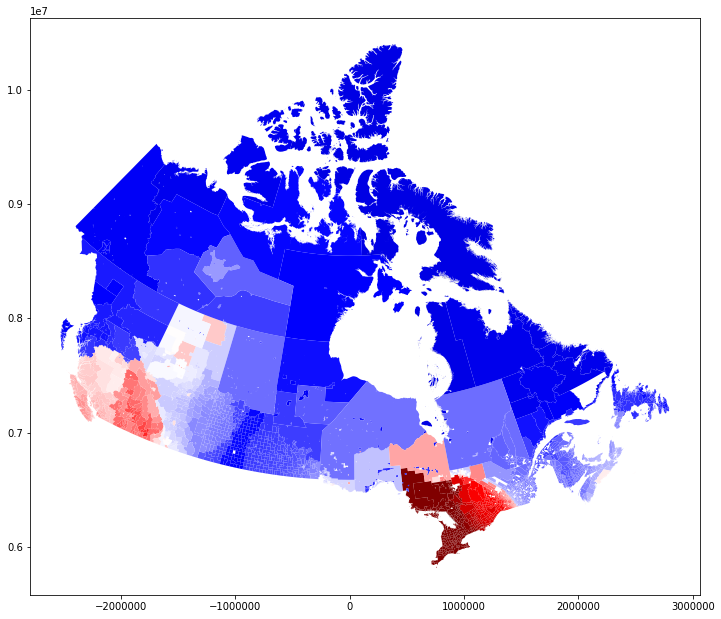

In [103]:
word_mapper(plot_data, 'cat')

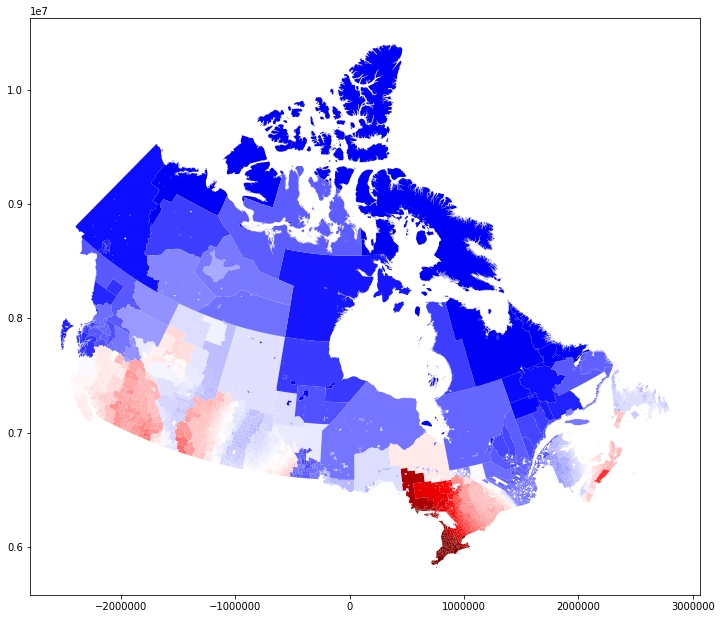

In [112]:
word_mapper(plot_data, 'moose')

# Run getisord on entire dataset and compute PCA

In [38]:
# Load region word matrix
word_matrix = pd.read_csv('./region_word_matrix.csv', index_col=0)

In [40]:
print(word_matrix.shape)
word_matrix.head()

(4240, 10000)


,by,david,featuring,is,in,vera,on,the,drive,vancouver,...,sainte-catherine,saint-marc,mont-tremblant,hausse,pointe-claire,pierre-elliott-trudeau,lente,dp-,n/gust,gmt+0000
5915022,10610,212,786,18567,24940,6909,17058,44997,7200,19253,...,0,0,0,0,0,0,0,0,0,0
5919008,34,2,0,151,5402,0,94,407,4,9,...,0,0,0,0,0,0,0,0,0,0
3520005,10414,632,183,57654,67355,9,61868,152713,720,173,...,0,0,0,0,0,0,0,0,0,0
4611040,2051,95,10,10790,11881,1,7437,26666,222,41,...,0,0,0,0,0,0,0,0,0,0
3539036,663,21,6,4560,4975,1,4424,11055,85,4,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# Split the dataframe into smaller subsets to run on multiple instances to speed up the process
splits = np.array_split(word_matrix.columns.tolist(), 10)

In [65]:
# Save as separate files to run getisord on multiple systems
for i in range(0,len(splits)):
    split = word_matrix[splits[i].tolist()]
    split.to_csv('{}k_words.csv'.format(i+1))

In [67]:
# Split the files among multiple systems. 
# Run first 3 on this system
files = os.listdir('./split_words')
files

['5k_words.csv',
 '8k_words.csv',
 '2k_words.csv',
 '7k_words.csv',
 '4k_words.csv',
 '9k_words.csv',
 '1k_words.csv',
 '6k_words.csv',
 '3k_words.csv',
 '10k_words.csv']

In [69]:
# First 3 files
file_1 = pd.read_csv('./split_words/1k_words.csv', index_col=0)
file_2 = pd.read_csv('./split_words/2k_words.csv', index_col=0)
file_3 = pd.read_csv('./split_words/3k_words.csv', index_col=0)

In [70]:
# Check
print("All files should have 1000 columns and 4240 rows")
print(file_1.shape)
print(file_2.shape)
print(file_3.shape)

# Preview of table
file_1.head()

All files should have 1000 columns and 4240 rows
(4240, 1000)
(4240, 1000)
(4240, 1000)


,by,david,featuring,is,in,vera,on,the,drive,vancouver,...,scratch,impressive,trend,gents,pt,sap,intern,associate,product,wants
5915022,10610,212,786,18567,24940,6909,17058,44997,7200,19253,...,20,36,29,10,21,41,32,75,70,203
5919008,34,2,0,151,5402,0,94,407,4,9,...,0,0,1,0,1,0,1,1,0,1
3520005,10414,632,183,57654,67355,9,61868,152713,720,173,...,112,119,121,34,101,37,53,243,302,1174
4611040,2051,95,10,10790,11881,1,7437,26666,222,41,...,29,16,22,3,16,2,3,40,29,318
3539036,663,21,6,4560,4975,1,4424,11055,85,4,...,15,2,12,5,9,3,3,14,13,86


In [75]:
start = time.time()
# local getisord on words of interest
results_1 = file_1.apply(local_getisord_by_word)
results_2 = file_2.apply(local_getisord_by_word)
results_3 = file_3.apply(local_getisord_by_word)
end = time.time()

print('Local Getisord on 3 files completed in: {}'.format(end-start))

print('Saving files...')
results_1.to_csv('./results/results_1.csv')
results_2.to_csv('./results/results_2.csv')
results_3.to_csv('./results/results_3.csv')
print('*****DONE*****')

Local Getisord on 3 files completed in: 9086.650696992874
Saving files...


In [78]:
# Check
print("All files should have 1000 columns and 4240 rows")
print(results_1.shape)
print(results_2.shape)
print(results_3.shape)

# Preview of table
results_1.head()

All files should have 1000 columns and 4240 rows
(4240, 1000)
(4240, 1000)
(4240, 1000)


,by,david,featuring,is,in,vera,on,the,drive,vancouver,...,scratch,impressive,trend,gents,pt,sap,intern,associate,product,wants
5915022,3.895743,1.554072,6.113742,1.153155,1.768336,5.295847,1.007839,1.290010,5.431506,5.987270,...,0.472083,1.255484,-0.221163,0.865356,0.439054,1.454664,2.221958,0.901292,1.150964,0.436373
5919008,2.057213,0.719831,3.065629,0.545909,1.168776,2.627360,0.395465,0.644342,2.694857,3.282706,...,0.094283,0.597633,-0.264184,0.266703,0.259916,0.400796,1.007258,0.329840,0.575603,0.073816
3520005,3.413936,4.183764,0.813768,4.401122,4.650043,-0.263264,4.573236,4.800522,0.538721,-0.296280,...,4.619132,4.258775,0.156406,5.182326,3.525890,2.807579,3.397958,3.950665,4.471664,5.738647
4611040,-0.449742,-0.330857,-0.459265,-0.446914,-0.586937,-0.272895,-0.544487,-0.488149,-0.357945,-0.340846,...,-0.078789,-0.547444,-0.328444,-0.937549,-0.508691,-0.796521,-0.592936,-0.600157,-0.547399,-0.195153
3539036,4.375675,4.722548,0.941332,5.913809,6.051882,-0.260698,6.001839,6.325822,0.994839,-0.288774,...,6.249213,5.191837,0.285540,7.034036,5.638655,2.316460,3.590311,4.931842,5.408525,8.001889


In [89]:
# Results
print('Loading all results...')
results_1 = pd.read_csv('./results/results_1.csv', index_col=0)
results_2 = pd.read_csv('./results/results_2.csv', index_col=0)
results_3 = pd.read_csv('./results/results_3.csv', index_col=0)
results_4 = pd.read_csv('./results/results_4.csv', index_col=0)
results_5 = pd.read_csv('./results/results_5.csv', index_col=0)
results_6 = pd.read_csv('./results/results_6.csv', index_col=0)
results_7 = pd.read_csv('./results/results_7.csv', index_col=0)
results_8 = pd.read_csv('./results/results_8.csv', index_col=0)
results_9 = pd.read_csv('./results/results_9.csv', index_col=0)
results_10 = pd.read_csv('./results/results_10.csv', index_col=0)
print('*****DONE*****')

Loading all results...
*****DONE*****


In [90]:
# Check all files 
print("All files should have 1000 columns and 4240 rows")
print(results_1.shape)
print(results_2.shape)
print(results_3.shape)
print(results_4.shape)
print(results_5.shape)
print(results_6.shape)
print(results_7.shape)
print(results_8.shape)
print(results_9.shape)
print(results_10.shape)

All files should have 1000 columns and 4240 rows
(4240, 1000)
(4240, 1000)
(4240, 1000)
(4240, 1000)
(4240, 1000)
(4240, 1000)
(4240, 1000)
(4240, 1000)
(4240, 1000)
(4240, 1000)


In [95]:
# Preview of table
results_2.head()

,action,well,hello,agree,tough,worse,isn't,done,slip,moose,...,traded,jb,fruits,recommend,shower,sauna,mata,chelsea,outta,planes
5915022,1.527721,0.804486,1.792071,0.942361,1.436413,0.644036,0.724400,0.653365,0.790826,0.612307,...,0.729751,0.118622,2.313473,1.762548,0.544348,1.630363,-0.234902,0.054320,-0.177323,1.660326
5919008,0.850110,0.381262,1.096839,0.520742,0.839705,0.255181,0.321796,0.262345,0.407073,0.099829,...,0.388715,-0.106886,1.182850,1.026263,0.106795,1.434076,-0.317465,-0.153041,-0.362494,1.062273
3520005,4.010787,5.070844,4.535885,4.457093,4.601102,5.134021,5.326553,5.173201,4.862030,2.682921,...,4.880671,6.114867,4.166665,4.120871,5.661359,5.263944,4.127752,5.043857,5.825960,4.541379
4611040,-0.450395,-0.433472,-0.627713,-0.535949,-0.461178,-0.522411,-0.413322,-0.559074,-0.835381,-0.711876,...,-0.203371,-0.855568,-0.615908,-0.801106,-0.564362,-0.827611,-0.055580,-0.535735,-0.056096,-0.583084
3539036,4.911931,7.070888,5.753497,5.977202,6.293353,7.399865,7.561474,7.124976,6.681244,3.796669,...,6.767452,8.112305,4.412747,5.262440,7.781389,7.425362,4.693877,6.746111,8.216553,5.949041


In [96]:
# Combine all dataframes together
full_results = pd.concat([results_1, results_2, results_3, results_4, results_5, results_6, results_7, results_8, results_9, results_10], axis=1)

In [97]:
# should be 10000 columns and 4240 rows
full_results.shape

(4240, 10000)

In [98]:
# Save output 
full_results.to_csv('./results/full_results.csv')

In [100]:
from sklearn.decomposition import PCA

In [101]:
pca = PCA(n_components=3)

In [103]:
%%time
principalComponents = pca.fit_transform(full_results)

CPU times: user 5.46 s, sys: 661 ms, total: 6.12 s
Wall time: 2.33 s


In [105]:
pca_data = pd.DataFrame(data=principalComponents, columns=['pc1', 'pc2', 'pc3'])

In [106]:
pca_data.head()

,pc1,pc2,pc3
0,96.651481,99.256246,2.913660
1,51.111416,73.827625,-0.228917
2,447.509678,-14.257330,2.031535
3,-36.079143,-7.418042,-1.113544
4,595.960360,-20.103161,2.954482


In [107]:
pca_data['CSDUID'] = full_results.index

In [108]:
print(pca_data.shape)
pca_data.head()

(4240, 4)


,pc1,pc2,pc3,CSDUID
0,96.651481,99.256246,2.913660,5915022
1,51.111416,73.827625,-0.228917,5919008
2,447.509678,-14.257330,2.031535,3520005
3,-36.079143,-7.418042,-1.113544,4611040
4,595.960360,-20.103161,2.954482,3539036


In [109]:
# Plot the PC1
plot_pca = canada_df.copy()
plot_pca['CSDUID'] = plot_pca['CSDUID'].astype('int')
plot_pca = plot_pca.merge(pca_data, on='CSDUID')
plot_pca.crs = {'init' : 'epsg:4326'}

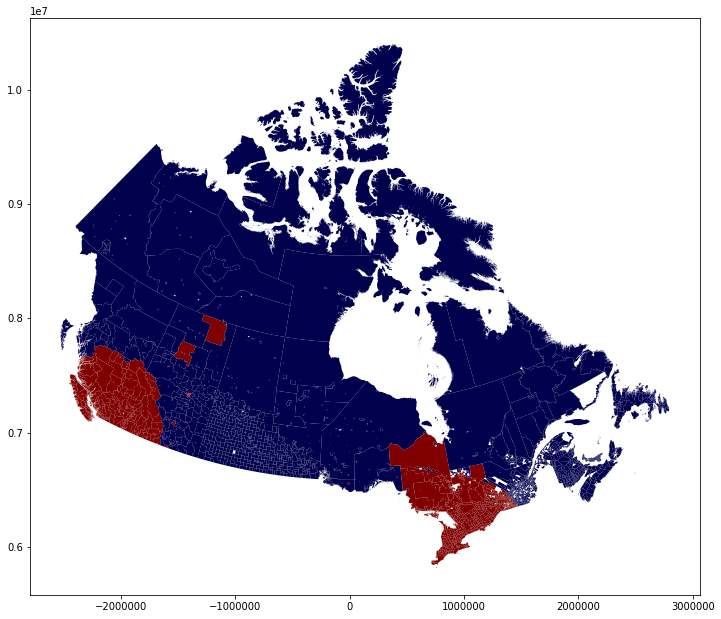

In [114]:
word_mapper(plot_pca, 'pc1')

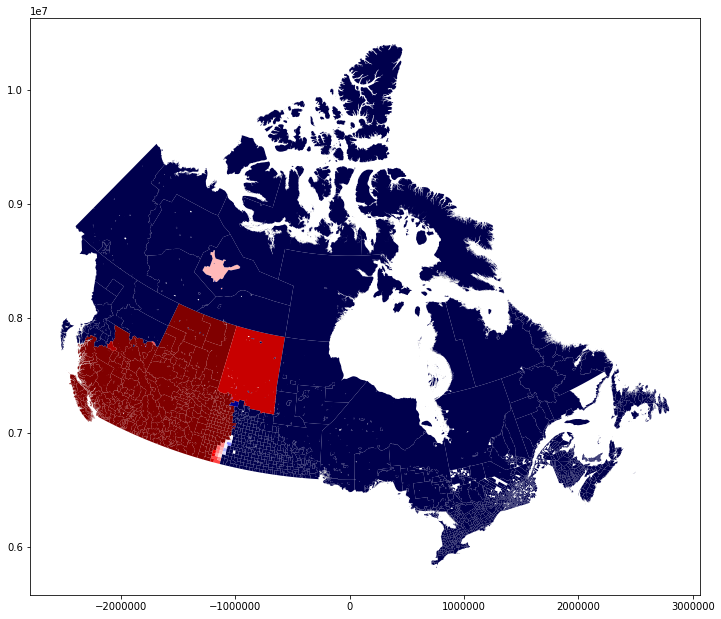

In [115]:
word_mapper(plot_pca, 'pc2')

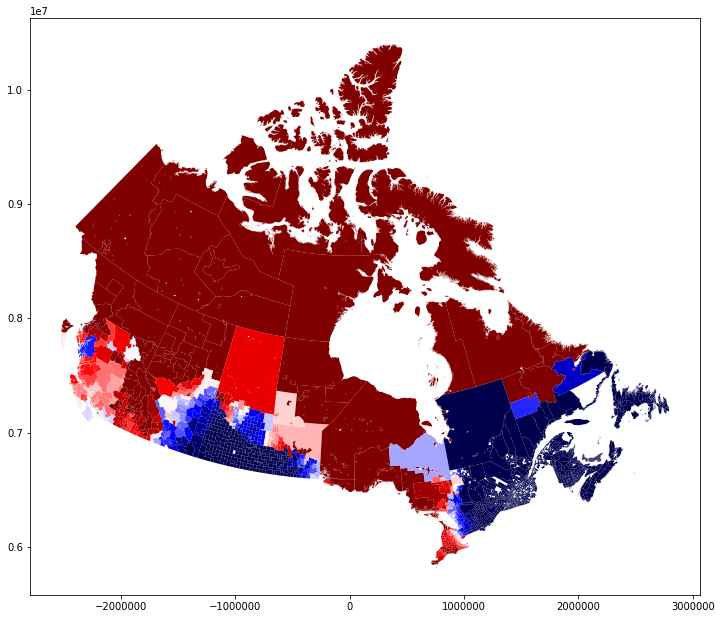

In [116]:
word_mapper(plot_pca, 'pc3')

# Recovering feature names in PC

In [117]:
# Use pca.components_ which outputs an array of n_components and n_features.
# Each coefficient represents the correlation between a particular pair of component and feature 
feature_names = pd.DataFrame(pca.components_, columns=full_results.columns, index = ['pc1','pc2', 'pc3'])

In [131]:
print(feature_names.shape)
feature_names

(3, 10000)


,by,david,featuring,is,in,vera,on,the,drive,vancouver,...,sainte-catherine,saint-marc,mont-tremblant,hausse,pointe-claire,pierre-elliott-trudeau,lente,dp-,n/gust,gmt+0000
pc1,0.008241,0.008375,0.002955,0.010060,0.010625,0.000724,0.010085,0.010781,0.002766,0.000966,...,0.000952,0.001124,0.001566,0.002891,0.001100,0.000922,0.002495,4.736325e-03,0.004187,-0.004025
pc2,0.018959,0.002207,0.030946,0.000711,0.007426,0.027620,-0.001707,0.001807,0.027556,0.034611,...,-0.006019,-0.007100,-0.007710,-0.008726,-0.007132,-0.006274,-0.007541,-7.337254e-03,-0.007652,-0.021047
pc3,0.001712,0.010422,0.000175,-0.000463,0.001512,0.000429,0.000583,0.001152,0.000027,0.000644,...,-0.002427,-0.002862,-0.002634,-0.002114,-0.002886,-0.002579,-0.001832,1.524911e-07,-0.000582,0.198480


In [128]:
feature_names.loc['pc1'].sort_values(ascending=False)[:5]

cottage         0.023813
g2              0.021838
conservation    0.020796
von             0.020258
chirp           0.019668
Name: pc1, dtype: float64

In [129]:
feature_names.loc['pc2'].sort_values(ascending=False)[:5]

british…    0.091254
hiking      0.085051
resort      0.082891
kesler      0.082787
okanagan    0.076479
Name: pc2, dtype: float64

In [130]:
feature_names.loc['pc3'].sort_values(ascending=False)[:5]

composite    0.207221
modis        0.203441
tile         0.199721
gmt+0000     0.198480
processed    0.197124
Name: pc3, dtype: float64